##PPGC - UFPEL
##2024/1 - 1110076 - 1 - TÓPICOS ESPECIAIS EM COMPUTAÇÃO IV - MINERAÇÃO DE DADOS EDUCACIONAIS

##Guilherme D. Lima - Mestrando em Computação

##Descrição da Atividade

Suponha que você foi contratado para ajudar a escola ‘X’ a melhorar a taxa de
aprovação em uma disciplina específica, que tem apresentado resultados abaixo do esperado
nos últimos anos. A escola ‘X’ disponibilizou uma base de dados aberta que contém
informações dos alunos que se matricularam na disciplina nos últimos 5 anos, incluindo
informações sobre suas notas nas disciplinas anteriores, gênero, idade, carga horária semanal
de estudo, entre outras.
Você decide usar uma técnica de mineração de dados para construir um modelo que
possa prever, com base nas informações disponíveis, se um aluno terá sucesso ou não na
disciplina em questão. Para isso, você vai utilizar uma técnica de classificação binária.
Vamos utilizar a base de dados "student-performance" disponível no repositório UCI
Machine Learning. Essa base de dados contém informações sobre alunos de matemática e
português de uma escola secundária em Portugal. Vamos criar um modelo que preveja se um
aluno terá sucesso ou não na disciplina de matemática ou português (você escolhe) com base
em algumas variáveis como gênero, idade, número de reprovações, carga horária semanal de
estudo, entre outras.

###1) Definição do Problema

A partir do enunciado você sabe que precisa prever se o aluno vai ter sucesso na
disciplina de matemática ou português a partir de notas parciais e de outros dados.

* Você sabe que é um problema de classificação binária. Você precisa classificar o aluno
como sucesso (geralmente representado por “1”) ou insucesso (geralmente
representado por “0 (zero)”).

* Observe que não temos uma variável categórica de sucesso e que você vai ter que
criá-la a partir da variável G3. Considere que o aluno teve sucesso se a média em G3
for maior ou igual a 12 (as notas em Portugal vão de 0 a 20).
Vamos importar então os dados e interpretá-los para tentar entender melhor o
problema.

### Bibliotecas

In [241]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as srn
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

###2) Carregamento dos Dados

Primeiramente, você deve baixar a base de dados do UCI Machine Learning que se encontra em https://archive.ics.uci.edu/ml/datasets/Student+Performance.

In [242]:
variable = 'student-mat.csv'
df = pd.read_csv(variable, delimiter=';')

### 3) Entendendo os dados a partir de uma análise descritiva

####3.1) Primeiramente, você pode usar o comando head(numero_linhas) para ter uma visualização rápida dos dados. Ele mostra as primeiras numero_linhas dos dados importados.

In [243]:
df.head(2)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6


####3.2) Você pode também usar print(df.dtypes) para saber os tipos dos dados e print(df.shape) para ver o formato do dataframe (número de instâncias X número de variáveis). Você vai ver que o Pandas salvou as strings com o tipo object e os números como inteiros. Isso não vai ser um problema para nós, mas se desejar você pode usar o parâmetro dtype do comando read_csv() para configurar os tipos desejados para as colunas

In [244]:
print(df.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object


####3.3 Você também pode usar o comando df.describe() para visualizar uma descrição qualitativa dos dados. Esse comando vai retornar os valores máximo e mínimo, média, desvio padrão e percentis para cada uma das variáveis. Também retorna a quantidade de dados em cada coluna.

In [245]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


####3.4) Você pode ainda verificar a distribuição das classes. Em problemas de classificação, conjuntos de dados desbalanceados (mais dados de uma classe de saída do que de outras) podem precisar de cuidados especiais. Assim, é importante verificar o balanceamento das classes. Você pode verificar isso com o comando abaixo, onde ‘class’ deve ser o nome da variável (coluna) output. Mas cuidado que em alguns problemas, como desse exercício, a classe output precisa ser criada primeiramente.


In [246]:
class_counts = df.groupby('famsize').size()
print(class_counts)

famsize
GT3    281
LE3    114
dtype: int64


###4. Pré-Processamento dos Dados

####4.1) Vamos primeiramente começar removendo as instâncias com dados faltantes com o comando dropna (videoaula 2.2). Como vimos que nossa base de dados não tem dados faltantes (item 3.3 acima), esse é um comando opcional para esse problema. Mas você pode querer inseri-lo mesmo assim caso no futuro deseje treinar o mesmo modelo com outra base de dados que você não tem certeza se vai ter ou não dados faltantes.

In [247]:
df = df.dropna() # Removendo registros com valores nulos

####4.2) Você pode ainda inserir o código para remover as instâncias duplicadas, caso existam.

In [248]:
df = df.drop_duplicates() # Removendo registros duplicados

####4.3) de treinamento do conjunto de teste. Isso porque o conjunto de treinamento não pode ser contaminado indiretamente pelo processamento que você vai realizar (sim, a gente não tomou esse cuidado na videoaula 2.3! Mas a ideia é ir vendo os conteúdos aos poucos). Por exemplo, se você considerar todo o conjunto de dados para a normalização, você está usando informação dos dados de teste para o treinamento, o que pode fazer com que seu algoritmo tenha um desempenho melhor do que o real. Embora esse seja um tipo de vazamento de dados (do inglês data leakage) indireto e menos perigoso que o data leakage direto quando usamos dados do teste no treinamento, ainda assim deve ser evitado e uma boa prática é separar os dados antes de qualquer pré-processamento. Você pode usar o comando train_test_split visto na videoaula 2.3.

In [249]:
X_train, X_test = train_test_split(df, test_size=0.3, random_state=35) #Separando os dados para o modelo

In [250]:
X_train.head() # Disposição dos dados do conjunto de dados de treino

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
38,GP,F,15,R,GT3,T,3,4,services,health,...,4,3,2,1,1,5,2,12,12,11
292,GP,F,18,U,LE3,T,2,1,services,at_home,...,5,4,3,1,1,5,12,12,12,13
64,GP,F,15,U,LE3,T,4,3,services,services,...,4,4,4,2,4,2,0,10,10,10
127,GP,F,19,U,GT3,T,0,1,at_home,other,...,3,4,2,1,1,5,2,7,8,9
283,GP,F,18,U,GT3,T,1,1,other,other,...,5,4,4,1,1,4,4,8,9,10


####4.4.1 Separe em dois dataframes diferentes as variáveis de entrada e saída do algoritmo de treinamento. Observe que não temos uma variável categórica de saída sucesso e que você vai ter que criá-la a partir da variável G3. Considere que o aluno teve sucesso se a média for maior ou igual a 12.

In [251]:
aprovado_train = pd.DataFrame({'G3': X_train['G3']}) # Calculando a média entre as duas provas para o treinamento
aprovado_test = pd.DataFrame({'G3': X_test['G3']}) # Calculando a média entre as duas provas para a saida do test

In [252]:
Y_train = pd.DataFrame({'Aprovado': [1 if media>= 12 else 0 for media in aprovado_train['G3']]}) # 0 para reprovado e 1 para aprovado, para aprovação deve ter uma média >= 6

Y_test = pd.DataFrame({'Aprovado': [1 if media>= 12 else 0 for media in aprovado_test['G3']]}) # 0 para reprovado e 1 para aprovado, para aprovação deve ter uma média >= 6

X_train.drop('G3', axis=1, inplace=True) # Removendo a coluna G3
X_test.drop('G3', axis=1, inplace=True) # Removendo a coluna G3

####4.4.2) processo de onehot-encoding.

In [253]:

dicionarioCategory = []

categorias_unicas = []

# Percorre as colunas que possuem o tipo "object" do DataFrame criando um dicionario com a chave sendo o nome da coluna e o valor sendo as categorias dessa coluna
for column in df:
  if df[column].dtype == 'object':
      categorias_unicas = df[column].unique()

      array_categorias = categorias_unicas.tolist()
      dicionarioCategory.append({column: array_categorias})
print(dicionarioCategory)

[{'school': ['GP', 'MS']}, {'sex': ['F', 'M']}, {'address': ['U', 'R']}, {'famsize': ['GT3', 'LE3']}, {'Pstatus': ['A', 'T']}, {'Mjob': ['at_home', 'health', 'other', 'services', 'teacher']}, {'Fjob': ['teacher', 'other', 'services', 'health', 'at_home']}, {'reason': ['course', 'other', 'home', 'reputation']}, {'guardian': ['mother', 'father', 'other']}, {'schoolsup': ['yes', 'no']}, {'famsup': ['no', 'yes']}, {'paid': ['no', 'yes']}, {'activities': ['no', 'yes']}, {'nursery': ['yes', 'no']}, {'higher': ['yes', 'no']}, {'internet': ['no', 'yes']}, {'romantic': ['no', 'yes']}]


In [254]:

def mofify(dataSet):
  for i in dicionarioCategory:
      column = list(i.keys())[0]

      # Verifica se há menos ou igual a 2 categorias, casos binários 0 para a primeira categoria do dicionario e 1 para a segunda categoria
      if len(list(i.values())[0]) <= 2:
          # Itera sobre os valores da coluna
          for value in dataSet[column]:
              # Converte o valor para 0 ou 1
              if value == list(i.values())[0][0]:
                  dataSet[column].replace({value: 0}, inplace=True)
              else:
                  dataSet[column].replace({value: 1}, inplace=True)
      else:
          # Se houver mais de 2 categorias, aplica one-hot encoding pois não se encaixa na classificação binária
          df_encoded = pd.get_dummies(dataSet[column], prefix=column) # Gera o One Hot Encoder

          column_encode = list(df_encoded.columns) # Pega a lista de colunas geradas pelo One Hot Encoder
          dataSet = pd.concat([dataSet, df_encoded], axis=1) # Une os dois conjuntos de dados, o original e o gerado do One Hot Encoder
          dataSet.drop(column, axis=1, inplace=True) # Drop do valor no eixo 1 (axis) indicando que é uma coluna que teve seu processo de One Hot Encoder

          # Converte o tipo false ou true para 0 ou 1
          for coluna in column_encode:
            dataSet[coluna] = dataSet[coluna].astype(int)
  return dataSet


In [255]:
X_train = mofify(X_train) # Chama a função para tratar os dados
X_test = mofify(X_test) # Chama a função para tratar os dados

# OBS é feito de forma separada conforme solicitado pela professora.

In [256]:
X_train.head() # Disposição dos dados para visualizar o tratamento dos dados realizado

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
38,1,1,15,1,1,1,3,4,1,3,...,0,0,0,1,0,0,0,0,1,0
292,1,1,18,0,1,1,2,1,1,2,...,0,0,0,0,0,0,1,0,1,0
64,1,1,15,0,1,1,4,3,1,2,...,0,1,0,0,0,0,1,1,0,0
127,1,1,19,0,1,1,0,1,1,2,...,1,0,0,1,0,0,0,0,0,1
283,1,1,18,0,1,1,1,1,2,2,...,1,0,0,0,1,0,0,0,1,0


In [257]:
X_test.head() # Disposição dos dados para visualizar o tratamento dos dados realizado

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
17,1,1,16,1,1,1,3,3,3,2,...,1,0,0,0,0,0,1,0,1,0
355,1,1,18,1,1,1,3,3,1,2,...,0,1,0,1,0,0,0,1,0,0
311,1,1,19,1,1,1,2,1,3,2,...,1,0,0,0,0,1,0,0,0,1
103,1,1,15,1,1,1,3,2,2,2,...,1,0,0,0,1,0,0,0,1,0
195,1,1,17,1,1,1,2,4,1,2,...,0,1,0,1,0,0,0,1,0,0


####4.5) Agora você pode padronizar os dados de treinamento de variáveis com distribuição normal. A padronização consiste em escalar os dados de tal forma que a média seja 0 e o desvio padrão 1. Uma maneira de verificar se os dados possuem distribuição normal é visualizar o histograma e/ou rodar o teste Shapiro (ver itens 4.1 e 4.2). Observe que embora a padronização em si vai ser realizada em todos os dados, você deve ajustar os dados considerando apenas os dados de treinamento (o ajuste pega o valor máximo e mínimo e faz os cálculos necessários). Para isso, você vai usar os comandos fit() e transform() separadamente. O fit() vai receber apenas os dados de treinamento e o transform() deve ser realizado nos dados de treinamento e teste separadamente.

######Normalizando os Dados

In [258]:
scaler_Norm = MinMaxScaler()
X_train_norm = scaler_Norm.fit_transform(X_train)
X_test_norm = scaler_Norm.transform(X_test)

####4.6) Concepção dos modelos de Regressão Logística, Árvore de Decisão e SVM.

#####Regressão Logística

In [259]:
modelo = LogisticRegression()
modelo.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#####Árvore de Decisão

######Correlação dos Dados e Tratamento

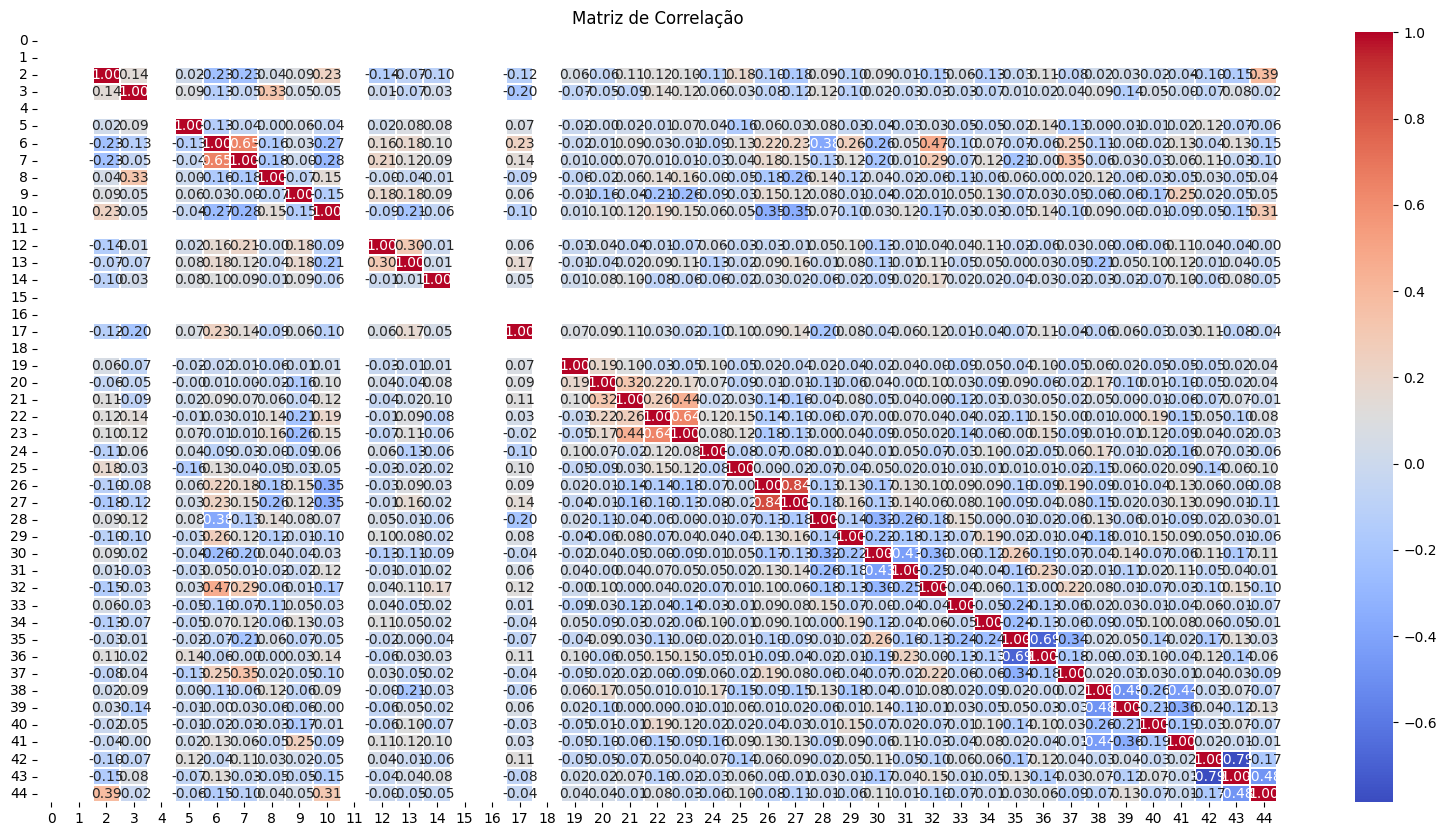

In [260]:
corre = pd.DataFrame(X_train_norm)

correlation = corre.corr()


plt.figure(figsize=(20, 10))

srn.heatmap(correlation,
            annot=True,
            fmt=".2f",
            cmap='coolwarm',
            linewidths=0.1,
            linecolor='white')

plt.title('Matriz de Correlação')
plt.show()

In [261]:
X_train_norm_df = pd.DataFrame(X_train_norm)
X_test_norm_df = pd.DataFrame(X_test_norm)

# Calcular a matriz de correlação
corr_matrix = X_train_norm_df.corr().abs()

# Definir o limiar de correlação
limiar = 0.8

# Selecionar o triângulo superior da matriz de correlação
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Encontrar as colunas com correlação acima do limiar
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > limiar)]

# Remover as colunas altamente correlacionadas
X_train_norm_reduced = X_train_norm_df.drop(columns=to_drop)
X_test_norm_reduced = X_test_norm_df.drop(columns=to_drop)

# Mostrar as colunas removidas e o novo DataFrame
print(f"Atributos removidos: {to_drop}")
print(X_train_norm_reduced.head())

Atributos removidos: [27]
    0    1         2    3    4    5     6     7         8         9   ...  \
0  0.0  0.0  0.000000  1.0  0.0  1.0  0.75  1.00  0.000000  0.666667  ...   
1  0.0  0.0  0.428571  0.0  0.0  1.0  0.50  0.25  0.000000  0.333333  ...   
2  0.0  0.0  0.000000  0.0  0.0  1.0  1.00  0.75  0.000000  0.333333  ...   
3  0.0  0.0  0.571429  0.0  0.0  1.0  0.00  0.25  0.000000  0.333333  ...   
4  0.0  0.0  0.428571  0.0  0.0  1.0  0.25  0.25  0.333333  0.333333  ...   

    35   36   37   38   39   40   41   42   43   44  
0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  
2  0.0  1.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  
3  1.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  
4  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  

[5 rows x 44 columns]


######Concepção do Modelo

In [262]:
dtc = DecisionTreeClassifier()

tree = dtc.fit(X_train_norm_reduced, Y_train)

#####SVM

######SVM Sigmoid

In [263]:
model_svm_sigmoid = svm.SVC(kernel='sigmoid')
model_svm_sigmoid.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='sigmoid')

######SVM Linear

In [264]:
model_svm_linear = svm.SVC(kernel='linear')
model_svm_linear.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear')

###5. Treinamento do Modelo

#####Regressão Logística

In [265]:
Y_pred = modelo.predict(X_test)

#####Tree

In [266]:
Y_pred_Tree = tree.predict(X_test_norm_reduced)

#####SMV Sigmoid

In [267]:
Y_pred_SVM_sigmoid = model_svm_sigmoid.predict(X_test)

#####SMV Linear

In [268]:
Y_pred_SVM_linear = model_svm_linear.predict(X_test)

###6. Avaliação do Modelo

#####Regressão Logistica

In [269]:
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print(f'Acuracia: {accuracy}') # Quantos aprovados e reprovados preditos corretamente
print(f'Precision: {precision}') # Número Total de preditos como aprovados, quantos são mesmo aprovados
print(f'recall: {recall}') # Número total de aprovados na base de dados quantos foram preditos como aprovados
print(f'f1: {f1}') # Média harmônica entre Precisão e Recall

Acuracia: 0.907563025210084
Precision: 0.9574468085106383
recall: 0.8333333333333334
f1: 0.8910891089108911


#####Tree

In [270]:
accuracy = accuracy_score(Y_test, Y_pred_Tree)
precision = precision_score(Y_test, Y_pred_Tree)
recall = recall_score(Y_test, Y_pred_Tree)
f1 = f1_score(Y_test, Y_pred_Tree)

print(f'Acuracia: {accuracy}') # Quantos aprovados e reprovados preditos corretamente
print(f'Precision: {precision}') # Número Total de preditos como aprovados, quantos são mesmo aprovados
print(f'recall: {recall}') # Número total de aprovados na base de dados quantos foram preditos como aprovados
print(f'f1: {f1}') # Média harmônica entre Precisão e Recall

Acuracia: 0.8151260504201681
Precision: 0.7580645161290323
recall: 0.8703703703703703
f1: 0.8103448275862069


#####SVM Sigmoid

In [271]:
accuracy = accuracy_score(Y_test, Y_pred_SVM_sigmoid)
precision = precision_score(Y_test, Y_pred_SVM_sigmoid)
recall = recall_score(Y_test, Y_pred_SVM_sigmoid)
f1 = f1_score(Y_test, Y_pred_SVM_sigmoid)

print(f'Acuracia: {accuracy}') # Quantos aprovados e reprovados preditos corretamente
print(f'Precision: {precision}') # Número Total de preditos como aprovados, quantos são mesmo aprovados
print(f'recall: {recall}') # Número total de aprovados na base de dados quantos foram preditos como aprovados
print(f'f1: {f1}') # Média harmônica entre Precisão e Recall

Acuracia: 0.7226890756302521
Precision: 0.7692307692307693
recall: 0.5555555555555556
f1: 0.6451612903225806


#####SVM Linear

In [272]:
accuracy = accuracy_score(Y_test, Y_pred_SVM_linear)
precision = precision_score(Y_test, Y_pred_SVM_linear)
recall = recall_score(Y_test, Y_pred_SVM_linear)
f1 = f1_score(Y_test, Y_pred_SVM_linear)

print(f'Acuracia: {accuracy}') # Quantos aprovados e reprovados preditos corretamente
print(f'Precision: {precision}') # Número Total de preditos como aprovados, quantos são mesmo aprovados
print(f'recall: {recall}') # Número total de aprovados na base de dados quantos foram preditos como aprovados
print(f'f1: {f1}') # Média harmônica entre Precisão e Recall

Acuracia: 0.9159663865546218
Precision: 0.9583333333333334
recall: 0.8518518518518519
f1: 0.9019607843137256


###**Justificativa**
####A Regressão Logística e o SVM com Kernel Linear se destacaram devido à sua capacidade de lidar eficazmente com a relação linear entre variáveis, oferecer um bom equilíbrio entre precisão e recall, e proporcionar modelos interpretáveis e robustos. Esses fatores contribuem para seu desempenho superior em comparação com outros modelos como Árvores de Decisão ou SVM com Kernel Sigmóide, que podem não ser tão eficazes em dados que não seguem um padrão linear ou exigem um ajuste mais rigoroso para otimização das métricas de desempenho.